# Data Exploration for Milestone 1
### Group CLR

For this project, we wish to showcase the magical world of chocolate. To do this, we will shed light on the elements that contribute to creating the perfect chocolate bar, be it the bean, the company, the flavour and so on. For this goal, we decided to evaluate mainly three publicly available datasets that were found on [Kaggle](https://www.kaggle.com/). All of the datasets contain 1000-2000 ratings of chocolate bars alongside some matedata on the latter. 


The first, and most promising, one was created by Manhattan Chocolate Society, Flavors of Cacao [Internet]. Available from: [http://flavorsofcacao.com/](http://flavorsofcacao.com/). The dataset was last updated three months ago and code for crawling the most up-to-date information from the website was published alongside the data ([script](https://www.kaggle.com/code/andrewmvd/chocolate-ratings-crawler)). As most datasets, the available data is USA/Canada centric, showing only chocolate bars produced by companies in the two countries. The website [http://flavorsofcacao.com/](http://flavorsofcacao.com/) appears very trustworthy and thorough. It contains the data that is available on the dataset plus lots of informative studies and surveys on chocolate that were conducted by the Manhattan Chocolate Society and might be nice to include to our website as well. 

The second and third are less up to date and contain fewer metadata fields. These were all retrieved from the same website, only 5 and 2 years before. For this reason, we decide to focus on the first.

## The data

The data contains information about different chocolate bars and includes 2733 reviews. The rating scale is defined as follows:

- 4.0 - 5.0 = Outstanding
- 3.5 - 3.9 = Highly Recommended
- 3.0 - 3.4 = Recommended
- 2.0 - 2.9 = Disappointing
- 1.0 - 1.9 = Unpleasant


The dataframes available have been downloaded and stored [here](./data/). What followa is a brief description of the fields in the two dataframes.

[Chocolate makers](data/chocolate_makers.csv):

- `COMPANY NAME`: Company that produces the chocolate bar.


- `CITY`: City where the company is based.


- `STATE/PROVINCE`: State or province where the company is based.


- `OWNER/MAKER`: Company owner(s).


- `COUNTRY`: Country where the company is based in.



[Chocolate ratings](data/chocolate_ratings.csv):

- `REF`: ID.


- `Company (Manufacturer)`: Company that produces the chocolate bar.


- `Company Location`: Country where the company is located.


- `Review Date`: Date of the review.


- `Country of Bean Origin`: Country where the beans where produced.


- `Specific Bean Origin or Bar Name`: Batch information of the beans.


- `Cocoa Percent`: Percentage of cocoa in the chocolate bar.


- `Ingredients`: Other relevant ingredients present.


- `Most Memorable Characteristics`: Reviewers most memorable taste experiences in the review.


- `Rating`: Chocolate rating.


In [1]:
import pandas_profiling as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [10]:
makers = pd.read_csv('data/chocolate_makers.csv')
ratings = pd.read_csv('data/chocolate_ratings.csv')

print(makers.columns)
print(ratings.columns)

df = makers.merge(ratings, right_on='Company (Manufacturer)', left_on='COMPANY NAME', how='outer')
print(df.shape)
profile = pp.ProfileReport(df)
profile.to_file(output_file="flavors_of_cacao.html")

Index(['COMPANY NAME', 'CITY', 'STATE/PROVINCE', 'OWNER/MAKER', 'COUNTRY'], dtype='object')
Index(['REF', 'Company (Manufacturer)', 'Company Location', 'Review Date',
       'Country of Bean Origin', 'Specific Bean Origin or Bar Name',
       'Cocoa Percent', 'Ingredients', 'Most Memorable Characteristics',
       'Rating'],
      dtype='object')
(2733, 15)


Export report to file: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


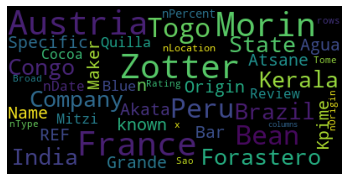

In [6]:
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)
data = df

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [10]:
model_count=df
ax2= px.treemap(model_count,path=["Company\nLocation"],title="Location of the manufacturer:")
ax2.show()

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\plotly\express\_core.py:1575: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)


https://www.kaggle.com/code/datapple/eda-chocolate-bar-ratings-analysis-statistic